In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
import datetime
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
Data_dir = '/content/gdrive/My Drive/Colab Notebooks/Datasets/MahineHack - Retail Price Prediction/'
df = pd.read_csv(Data_dir+ 'Train.csv')
test_data = pd.read_csv(Data_dir + 'Test.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


## New Section





In [ ]:
df.shape

(284780, 8)

In [10]:
Data_dir = '/content/gdrive/My Drive/Colab Notebooks/Datasets/MahineHack - Retail Price Prediction/'
ff = pd.read_csv(Data_dir+ 'DataPrep1.csv')
ff.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Timelight,Weekday
0,6141,1583,144,3,3.75,14056.0,35,2011,5,6,Noon,Friday
1,6349,1300,3682,6,1.95,13098.0,35,2011,5,11,Morning,Wednesday
2,16783,2178,1939,4,5.95,15044.0,35,2011,11,20,Noon,Sunday
3,16971,2115,2983,1,0.83,15525.0,35,2011,11,22,Noon,Tuesday
4,6080,1210,2886,12,1.65,13952.0,35,2011,5,6,Morning,Friday


In [11]:
ff.shape

(284780, 12)

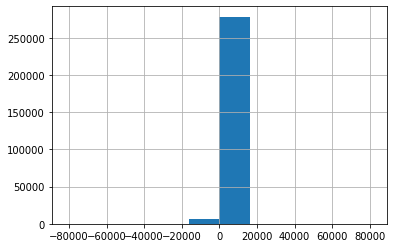

In [ ]:
#df.drop(['InvoiceNo'],axis=1,inplace=True)
df.Quantity.hist()

In [ ]:
ff['Quantity'] = ff['Quantity'].abs()

In [12]:
def transformation(data):
  data['Quantity'] = data['Quantity'].abs()
  data['Month'] = data['Month'].apply(lambda x: 'A' if x in range(1,5) else ( 'B' if x in range(5,9) else  'C'))
  data['Day'] = data['Day'].apply(lambda x: 'week1' if x in range(1,11) else ( 'week2' if x in range(11,21) else 'week3') )
  #data1 = data.drop(['InvoiceNo'],axis=1)
  return data

ff = transformation(ff)

In [13]:
for i in range(0,len(ff)):
  if ff.loc[i,'UnitPrice'] == 0 :
    a = ff.loc[i,'StockCode']
    ff.loc[i,'UnitPrice'] = ff[ff.StockCode == a].UnitPrice.mean()

ff[ff.StockCode==3681].UnitPrice.mean()     #check whether it is 339

339.938574117959

In [14]:
ff.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Timelight,Weekday
0,6141,1583,144,3,3.75,14056.0,35,2011,B,week1,Noon,Friday
1,6349,1300,3682,6,1.95,13098.0,35,2011,B,week2,Morning,Wednesday
2,16783,2178,1939,4,5.95,15044.0,35,2011,C,week2,Noon,Sunday
3,16971,2115,2983,1,0.83,15525.0,35,2011,C,week3,Noon,Tuesday
4,6080,1210,2886,12,1.65,13952.0,35,2011,B,week1,Morning,Friday


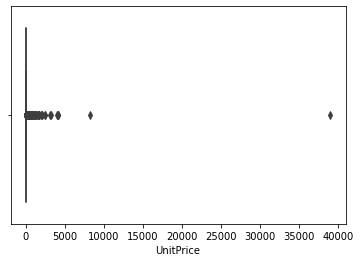

In [ ]:
sns.boxplot(x='UnitPrice',data=df)

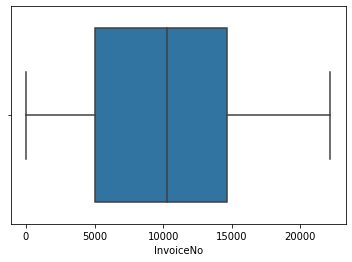

In [ ]:
sns.boxplot(x='InvoiceNo',data=df)

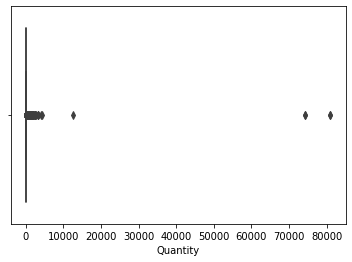

In [ ]:
sns.boxplot(x='Quantity',data=df)

In [ ]:
df[df.Quantity > 10000]

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Timelight,Weekday
26477,3034,248,12540,0.521154,13256.0,35,2011,C,week3,Noon,Friday
141379,2001,2002,74215,1.040000,12346.0,35,2011,A,week2,Morning,Tuesday
180978,2403,2329,80995,2.080000,16446.0,35,2011,C,week1,Morning,Friday
210734,2403,2329,80995,2.080000,16446.0,35,2011,C,week1,Morning,Friday
271013,2001,2002,74215,1.040000,12346.0,35,2011,A,week2,Morning,Tuesday


In [341]:
df.drop(df[df.Quantity > 10000].index,axis=0,inplace=True)
df[df.Quantity > 10000]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Timelight,Weekday


In [344]:
df[df.UnitPrice > 2500]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Timelight,Weekday


In [343]:
df.drop(df[df.UnitPrice > 2500].index,axis=0,inplace=True)
df[df.UnitPrice > 2500]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Timelight,Weekday


In [345]:
df.to_csv(Data_dir+"final_data.csv")

Prepare test_data

In [ ]:
def test_data_transformation(train):
  train['Date'] = train['InvoiceDate'].apply(lambda x: x.split(' ')[0])
  train['InvoiceDate'] = pd.to_datetime(train['InvoiceDate'])
  train['Year'] = train['InvoiceDate'].dt.year
  train['Month'] = train['InvoiceDate'].dt.month
  train['Day'] = train['InvoiceDate'].dt.day
  train['Time'] = train['InvoiceDate'].dt.time 
  train['Timelight'] = train['Time'].apply(lambda x : 'Morning' if 6<=x.hour<12 else ('Noon' if 12<=x.hour<18 else 'Night' ))
  day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
  train['Weekday'] = train['Date'].apply(lambda x: day_name[datetime.datetime.strptime(x, '%Y-%m-%d').weekday()])
  #train1 = train.copy()
  train.drop(['InvoiceDate','Time'],axis = 1,inplace=True)
  train['Quantity'] = train['Quantity'].abs()
  train['Month'] = train['Month'].apply(lambda x: 'A' if x in range(1,5) else ( 'B' if x in range(5,9) else  'C'))
  train['Day'] = train['Day'].apply(lambda x: 'week1' if x in range(1,11) else ( 'week2' if x in range(11,21) else 'week3') )
  return train

In [ ]:
test_data_transformation(test_data)
test_data.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,Date,Year,Month,Day,Timelight,Weekday
0,3139,1709,1079,3,16161.0,35,2011-02-22,2011,A,week3,Noon,Tuesday
1,617,510,3457,1,17341.0,35,2010-12-08,2010,C,week1,Noon,Wednesday
2,14653,604,694,36,15158.0,35,2011-10-25,2011,C,week3,Noon,Tuesday
3,8634,1478,3473,2,16033.0,35,2011-06-27,2011,B,week3,Noon,Monday
4,15546,3216,871,1,15351.0,35,2011-11-06,2011,C,week1,Noon,Sunday


In [ ]:
test_data.drop(['Date'],axis=1,inplace=True)

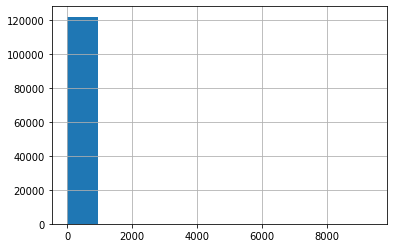

In [ ]:
test_data.Quantity.hist()

In [ ]:
test_data.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,Year,Month,Day,Timelight,Weekday
0,3139,1709,1079,3,16161.0,35,2011,A,week3,Noon,Tuesday
1,617,510,3457,1,17341.0,35,2010,C,week1,Noon,Wednesday
2,14653,604,694,36,15158.0,35,2011,C,week3,Noon,Tuesday
3,8634,1478,3473,2,16033.0,35,2011,B,week3,Noon,Monday
4,15546,3216,871,1,15351.0,35,2011,C,week1,Noon,Sunday


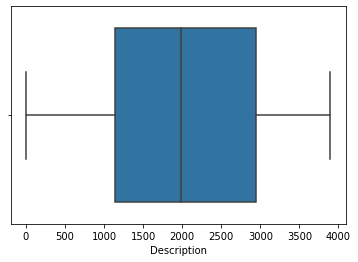

In [ ]:
sns.boxplot(x='Description',data=df)

In [ ]:
df1 = df.copy()

In [ ]:
test_data.to_csv(Data_dir+"final_test_data.csv")

In [ ]:
from sklearn.preprocessing import PowerTransformer
y = y.values.reshape(-1,1)
# power transform the raw data
power = PowerTransformer(method='yeo-johnson', standardize=True)
y = power.fit_transform(y)

2nd Transformation

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [ ]:
def test_data_transformation(train):
  train['Date'] = train['InvoiceDate'].apply(lambda x: x.split(' ')[0])
  train['InvoiceDate'] = pd.to_datetime(train['InvoiceDate'])
  train['Year'] = train['InvoiceDate'].dt.year
  train['Month'] = train['InvoiceDate'].dt.month
  train['Day'] = train['InvoiceDate'].dt.day
  train['Time'] = train['InvoiceDate'].dt.time 
  train['Timelight'] = train['Time'].apply(lambda x : 'Morning' if 6<=x.hour<12 else ('Noon' if 12<=x.hour<18 else 'Night' ))
  day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
  train['Weekday'] = train['Date'].apply(lambda x: day_name[datetime.datetime.strptime(x, '%Y-%m-%d').weekday()])
  #train1 = train.copy()
  train.drop(['InvoiceDate','Time','Date'],axis = 1,inplace=True)
  train['Quantity'] = train['Quantity'].abs()
  #train['Month'] = train['Month'].apply(lambda x: 'A' if x in range(1,5) else ( 'B' if x in range(5,9) else  'C'))
  #train['Day'] = train['Day'].apply(lambda x: 'week1' if x in range(1,11) else ( 'week2' if x in range(11,21) else 'week3') )
  return train

In [ ]:
df = test_data_transformation(df)
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Timelight,Weekday
0,6141,1583,144,3,3.75,14056.0,35,2011,5,6,Noon,Friday
1,6349,1300,3682,6,1.95,13098.0,35,2011,5,11,Morning,Wednesday
2,16783,2178,1939,4,5.95,15044.0,35,2011,11,20,Noon,Sunday
3,16971,2115,2983,1,0.83,15525.0,35,2011,11,22,Noon,Tuesday
4,6080,1210,2886,12,1.65,13952.0,35,2011,5,6,Morning,Friday


In [ ]:
test = test_data_transformation(test_data)
test.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,Year,Month,Day,Timelight,Weekday
0,3139,1709,1079,3,16161.0,35,2011,2,22,Noon,Tuesday
1,617,510,3457,1,17341.0,35,2010,12,8,Noon,Wednesday
2,14653,604,694,36,15158.0,35,2011,10,25,Noon,Tuesday
3,8634,1478,3473,2,16033.0,35,2011,6,27,Noon,Monday
4,15546,3216,871,1,15351.0,35,2011,11,6,Noon,Sunday


In [ ]:
def trans_sec(train):
  train1 = train.copy()
  train1['Country'] = train1['StockCode']*train1['Country']
  train1['Year'] = train1['StockCode']*train1['Year']
  train1['Month'] = train1['StockCode']*train1['Month']
  train1['Day'] = train1['StockCode']*train1['Day']
  return train1

df1 = trans_sec(df)
df1.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Timelight,Weekday
0,6141,1583,144,3,3.75,14056.0,55405,3183413,7915,9498,Noon,Friday
1,6349,1300,3682,6,1.95,13098.0,45500,2614300,6500,14300,Morning,Wednesday
2,16783,2178,1939,4,5.95,15044.0,76230,4379958,23958,43560,Noon,Sunday
3,16971,2115,2983,1,0.83,15525.0,74025,4253265,23265,46530,Noon,Tuesday
4,6080,1210,2886,12,1.65,13952.0,42350,2433310,6050,7260,Morning,Friday


In [ ]:
df1.drop(df1[df1.Quantity > 10000].index,axis=0,inplace=True)
df1[df1.Quantity > 10000]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Timelight,Weekday


In [ ]:
df1.drop(df1[df1.UnitPrice > 2500].index,axis=0,inplace=True)
df1[df1.UnitPrice > 2500]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Timelight,Weekday


In [ ]:
test1 = trans_sec(test)
test1.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,Year,Month,Day,Timelight,Weekday
0,3139,1709,1079,3,16161.0,59815,3436799,3418,37598,Noon,Tuesday
1,617,510,3457,1,17341.0,17850,1025100,6120,4080,Noon,Wednesday
2,14653,604,694,36,15158.0,21140,1214644,6040,15100,Noon,Tuesday
3,8634,1478,3473,2,16033.0,51730,2972258,8868,39906,Noon,Monday
4,15546,3216,871,1,15351.0,112560,6467376,35376,19296,Noon,Sunday


Prepare Random Forest Model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


num_attribs = ['StockCode','Quantity','Description','CustomerID','InvoiceNo','Country']
cat_attribs = [ 'Weekday','Timelight','Year','Month','Day']

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [ ]:
df['Country'] = df['StockCode']*df['Country']
test_data['Country'] = test_data['StockCode']*test_data['Country']

In [ ]:
X= df[['InvoiceNo','StockCode', 'Quantity', 'Country','Year','Month','Day','Weekday','Description','CustomerID','Timelight']]
y = df['UnitPrice']

X = full_pipeline.fit_transform(X)
test_data = full_pipeline.fit_transform(test_data)
print(X.shape)
print(test_data.shape)

(284767, 23)
(122049, 23)


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from pprint import pprint

rf = RandomForestRegressor()

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

# Randomized Search CV

# Number of trees in random forest
n_estimators = randint(low=1, high=250)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(0, 30, num = 10)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap' : bootstrap}
          

pprint(random_grid)

rf = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import train_test_split

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1,scoring='neg_mean_squared_error', random_state=42)

# Fit the random search model
# In order to test these models I will need to do a train test split with the training data-set. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf_random.fit(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=23, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=81, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

rfr.fit(X,y)

predictions = rfr.predict(test_data)
#rfr_mse = mean_squared_error(y_test, predictions)
#rfr_rmse = np.sqrt(rfr_mse)
#rfr_rmse

In [ ]:
# Applying inverse power transform to get back original form of unit price
predictions = pd.DataFrame(data=predictions)
a_inverse_transformed = power.inverse_transform(predictions)
#a_inverse_transformed

In [ ]:
result = pd.DataFrame(data=a_inverse_transformed).round(2)
result.head()

,0
0,1.20
1,1.25
2,3.08
3,1.65
4,5.45


In [ ]:
result.to_excel(Data_dir+"predictions"+str(21)+".xlsx")

In [360]:
predictions = np.exp(predictions)

In [361]:
text = 'SUB25-Tunedtree_withlog'
np.savetxt(Data_dir+"predictions"+str(25)+text+".csv", predictions, delimiter=",")

In [363]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

for i in range(2,20,2):
  tree_reg = DecisionTreeRegressor( max_depth=76,
  max_features='auto', max_leaf_nodes=None,
  min_impurity_split=1e-08, min_samples_leaf=2,
  min_samples_split=i, min_weight_fraction_leaf=0.0,
  presort=i, random_state=None)
  tree_reg.fit(X_train,y_train)
  preds = tree_reg.predict(X_test)

  rmse = np.sqrt(mean_squared_error(y_test, preds))
  print("RMSE: %f" % (rmse) + " max_depth: %f" %(i))

#tree_reg.fit(X,y)
#predictions = tree_reg.predict(test_data)
#27 max depth

RMSE: 0.230387 max_depth: 2.000000
RMSE: 0.229966 max_depth: 4.000000
RMSE: 0.228321 max_depth: 6.000000
RMSE: 0.225823 max_depth: 8.000000
RMSE: 0.225272 max_depth: 10.000000
RMSE: 0.224517 max_depth: 12.000000
RMSE: 0.226449 max_depth: 14.000000
RMSE: 0.226928 max_depth: 16.000000
RMSE: 0.229448 max_depth: 18.000000


In [359]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree_reg = DecisionTreeRegressor( max_depth=58,
  max_features='auto', max_leaf_nodes=None,
  min_impurity_split=1e-08, min_samples_leaf=2,
  min_samples_split=12, min_weight_fraction_leaf=0.0,
  presort=False, random_state=None)

tree_reg.fit(X,y)
predictions = tree_reg.predict(test_data)

In [ ]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb

#data_dmatrix = xgb.DMatrix(data=X,label=y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

for i in (0.4,0.5,0.2,0.3,0.6,0.7,0.8,0.9,1):
  xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = i, learning_rate = 0.1, max_depth = 6, 
                          alpha = 1, n_estimators = 145)
  xg_reg.fit(X_train,y_train)
  preds = xg_reg.predict(X_test)

  rmse = np.sqrt(mean_squared_error(y_test, preds))
  print("RMSE: %f" % (rmse) + " max_depth: %f" %(i))

#max depth 6 rmse 11.099

RMSE: 11.274182 max_depth: 0.400000
RMSE: 11.150281 max_depth: 0.500000
RMSE: 11.556741 max_depth: 0.200000
RMSE: 11.414145 max_depth: 0.300000
RMSE: 11.003075 max_depth: 0.600000
RMSE: 10.967591 max_depth: 0.700000
RMSE: 10.959443 max_depth: 0.800000
RMSE: 11.009430 max_depth: 0.900000
RMSE: 11.119826 max_depth: 1.000000


In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.8, learning_rate = 0.1, max_depth = 6, 
                          alpha = 1, n_estimators = 145)

xg_reg.fit(X,y)
predictions = xg_reg.predict(test_data)

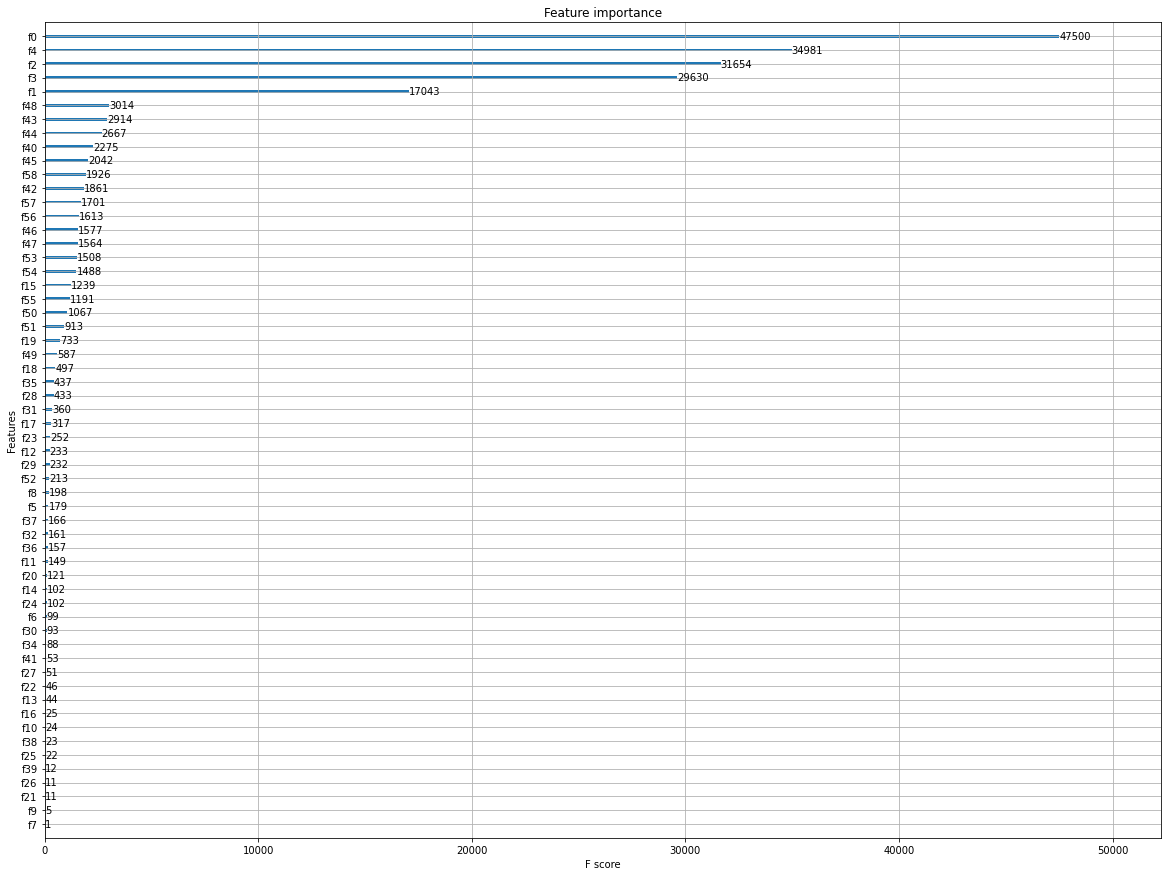

In [ ]:
import xgboost as xgb
plt.figure(figsize=(20,15)) 
xgb.plot_importance(xg_reg, ax=plt.gca())

## Final

In [468]:
Data_dir = '/content/gdrive/My Drive/Colab Notebooks/Datasets/MahineHack - Retail Price Prediction/'
df = pd.read_csv(Data_dir+ 'final_data.csv')
test_data = pd.read_csv(Data_dir + 'final_test_data.csv')
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Timelight,Weekday
0,0,6141,1583,144,3,3.75,14056.0,35,2011,B,week1,Noon,Friday
1,1,6349,1300,3682,6,1.95,13098.0,35,2011,B,week2,Morning,Wednesday
2,2,16783,2178,1939,4,5.95,15044.0,35,2011,C,week2,Noon,Sunday
3,3,16971,2115,2983,1,0.83,15525.0,35,2011,C,week3,Noon,Tuesday
4,4,6080,1210,2886,12,1.65,13952.0,35,2011,B,week1,Morning,Friday


In [469]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Timelight,Weekday
0,6141,1583,144,3,3.75,14056.0,35,2011,B,week1,Noon,Friday
1,6349,1300,3682,6,1.95,13098.0,35,2011,B,week2,Morning,Wednesday
2,16783,2178,1939,4,5.95,15044.0,35,2011,C,week2,Noon,Sunday
3,16971,2115,2983,1,0.83,15525.0,35,2011,C,week3,Noon,Tuesday
4,6080,1210,2886,12,1.65,13952.0,35,2011,B,week1,Morning,Friday


In [470]:
df.shape

(284767, 12)

In [471]:
test_data.drop(['Unnamed: 0'],axis=1,inplace=True)
test_data.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,Year,Month,Day,Timelight,Weekday
0,3139,1709,1079,3,16161.0,35,2011,A,week3,Noon,Tuesday
1,617,510,3457,1,17341.0,35,2010,C,week1,Noon,Wednesday
2,14653,604,694,36,15158.0,35,2011,C,week3,Noon,Tuesday
3,8634,1478,3473,2,16033.0,35,2011,B,week3,Noon,Monday
4,15546,3216,871,1,15351.0,35,2011,C,week1,Noon,Sunday


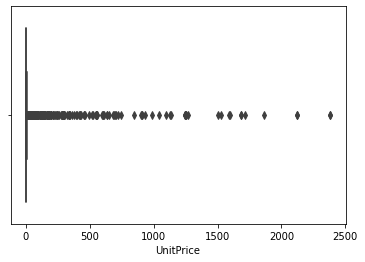

In [472]:
sns.boxplot(x='UnitPrice',data=df)

In [473]:
main_list = np.setdiff1d(test_data.StockCode,df.StockCode)
main_list

array([  54,   56,   75,   88,  107,  141,  155,  260,  274,  556,  558,
        717,  825,  826, 1045, 1110, 1204, 1230, 2261, 2420, 2428, 2529,
       2549, 2571, 2604, 2651, 2739, 2752, 2759, 2801, 2826, 2909, 2932,
       2968, 2983, 3014, 3033, 3049, 3154, 3195, 3229, 3242, 3288, 3368,
       3389, 3400, 3409, 3419, 3431, 3446, 3463, 3481, 3483, 3484, 3516,
       3526, 3527, 3559, 3562, 3564, 3579, 3589, 3590, 3619, 3671])

In [474]:
df[df.StockCode==3559]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Timelight,Weekday


In [475]:
 test_uni = test_data[test_data['StockCode'].isin(main_list)]
 test_uni

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,Year,Month,Day,Timelight,Weekday
1565,17251,3516,3738,1,17364.0,35,2011,C,week3,Noon,Thursday
3056,1998,825,1403,2,15498.0,35,2011,A,week2,Noon,Thursday
5492,926,3463,2574,2,17231.0,35,2010,C,week2,Noon,Monday
7567,307,2932,2434,2,12725.0,18,2010,C,week1,Noon,Friday
8592,19709,3049,3296,1,15299.0,35,2011,A,week2,Morning,Thursday
...,...,...,...,...,...,...,...,...,...,...,...
113691,2822,717,1389,1,14715.0,35,2011,A,week2,Noon,Monday
114179,1270,3579,1059,1,12748.0,35,2010,C,week2,Noon,Friday
114233,16360,2261,3074,12,16156.0,35,2011,C,week2,Noon,Tuesday
114292,4494,3154,1162,3,15033.0,35,2011,A,week3,Noon,Monday


In [476]:
print(test_uni.shape)
print(test_data.shape)

(91, 11)
(122049, 11)


In [477]:
test_com = test_data.drop(test_uni.index) 
test_com.shape

(121958, 11)

In [478]:
np.setdiff1d(test_com.StockCode,df.StockCode)

array([], dtype=int64)

In [479]:
df[df.StockCode==510].UnitPrice.value_counts()

1.25    29
0.83     8
2.46     1
Name: UnitPrice, dtype: int64

In [480]:
df[df.StockCode==510].UnitPrice.mode()[0]

1.25

In [481]:
np.sqrt(((((1.25 - 1.25)**2)*29) + (((0.83 - 1.25)**2)*8) + (((2.46 - 1.25)**2)*29) )/38)

1.0744655954424385

In [482]:
def price(data):
  for i in range(0,len(data)):
    a = data.loc[i,'StockCode']
    b = data[data.StockCode==a].UnitPrice.mode()[0]
    data.loc[i,'ModePrice'] = b

In [45]:
price(df)
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Timelight,Weekday,ModePrice
0,6141,1583,144,3,3.75,14056.0,35,2011,B,week1,Noon,Friday,3.75
1,6349,1300,3682,6,1.95,13098.0,35,2011,B,week2,Morning,Wednesday,1.95
2,16783,2178,1939,4,5.95,15044.0,35,2011,C,week2,Noon,Sunday,5.95
3,16971,2115,2983,1,0.83,15525.0,35,2011,C,week3,Noon,Tuesday,0.83
4,6080,1210,2886,12,1.65,13952.0,35,2011,B,week1,Morning,Friday,1.65


In [46]:
df.to_csv(Data_dir+"ModePrice_data.csv",index=False)

In [483]:
df = pd.read_csv(Data_dir+ 'ModePrice_data.csv')

In [484]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(df.UnitPrice,df.ModePrice))

78.30221694495715

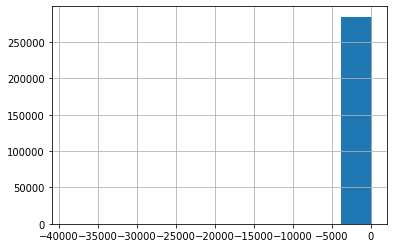

In [485]:
df['PriceDiff'] = df['ModePrice']-df['UnitPrice']
df['PriceDiff'].hist()

In [486]:
df.ModePrice.isnull().sum()

0

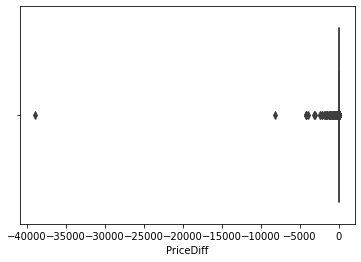

In [487]:
sns.boxplot(x='PriceDiff',data=df)

In [488]:
df.PriceDiff.describe()

count    284780.000000
mean         -0.496006
std          78.300783
min      -38969.150000
25%           0.000000
50%           0.000000
75%           0.000000
max          80.000000
Name: PriceDiff, dtype: float64

In [489]:
df_exc_list = list(set(df[df.PriceDiff<-100].StockCode))

In [490]:
df[df.StockCode == 3682]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Timelight,Weekday,ModePrice,PriceDiff
36993,5350,3682,2285,1,0.00100,13952.0,35,2011,A,week2,Morning,Friday,0.001,0.00000
71706,9869,3682,2285,1,0.00100,15618.0,35,2011,B,week3,Morning,Tuesday,0.001,0.00000
163862,12763,3682,2285,1,0.00100,16198.0,35,2011,C,week3,Noon,Sunday,0.001,0.00000
194547,12722,3682,2285,1,0.00075,16133.0,35,2011,C,week3,Noon,Sunday,0.001,0.00025


In [491]:
df.shape

(284780, 14)

In [492]:
df_exc = df[df['StockCode'].isin(df_exc_list)]
df_exc.shape

(1491, 14)

In [493]:
df_norm = df.drop(df_exc.index) 
df_norm.shape

(283289, 14)

In [494]:
test_exc = test_com[test_com['StockCode'].isin(df_exc_list)]
test_exc.shape

(644, 11)

In [495]:
test_norm = test_com.drop(test_exc.index) 
test_norm.shape

(121314, 11)

In [496]:
len(test_data) == len(test_uni) + len(test_exc) + len(test_norm)

True

### Norm

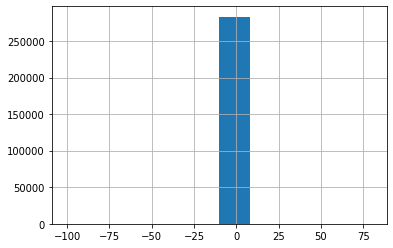

In [497]:
df_norm.PriceDiff.hist()

In [498]:
np.sqrt(mean_squared_error(df_norm.UnitPrice,df_norm.ModePrice))

0.6627062153490887

In [499]:
test_norm.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,Year,Month,Day,Timelight,Weekday
0,3139,1709,1079,3,16161.0,35,2011,A,week3,Noon,Tuesday
1,617,510,3457,1,17341.0,35,2010,C,week1,Noon,Wednesday
2,14653,604,694,36,15158.0,35,2011,C,week3,Noon,Tuesday
3,8634,1478,3473,2,16033.0,35,2011,B,week3,Noon,Monday
4,15546,3216,871,1,15351.0,35,2011,C,week1,Noon,Sunday


In [500]:
dicts = {}
keys = list(set(test_norm.StockCode))
#values = ["Hi", "I", "am", "John"]
for i in keys:
        dicts[i] = df_norm[df_norm.StockCode==i].UnitPrice.mode()[0]
print(dicts)

{0: 0.85, 1: 0.39, 2: 0.21, 4: 0.42, 5: 0.42, 6: 0.85, 7: 0.42, 8: 1.25, 9: 1.69, 10: 0.29, 11: 0.14, 12: 0.83, 13: 0.85, 14: 2.95, 15: 2.95, 16: 2.95, 17: 2.95, 18: 5.95, 19: 5.95, 20: 5.95, 21: 7.95, 22: 7.95, 23: 7.95, 24: 3.75, 25: 0.12, 26: 0.12, 27: 0.21, 28: 0.21, 29: 0.42, 30: 0.5, 31: 0.85, 33: 0.12, 35: 0.04, 36: 0.85, 37: 0.12, 39: 0.42, 40: 0.12, 41: 1.25, 42: 0.42, 43: 0.42, 44: 0.1, 46: 0.42, 47: 0.42, 48: 0.65, 49: 0.42, 50: 0.42, 51: 0.42, 52: 0.42, 53: 0.42, 58: 0.5, 60: 2.95, 61: 2.95, 62: 0.06, 63: 0.06, 64: 0.06, 65: 1.25, 66: 0.21, 67: 0.21, 68: 0.21, 69: 0.21, 70: 0.5, 71: 1.25, 72: 0.85, 73: 0.42, 74: 0.08, 76: 0.29, 78: 0.65, 79: 0.85, 80: 0.85, 81: 0.85, 82: 0.85, 83: 0.5, 84: 0.85, 85: 0.42, 86: 0.42, 87: 0.3, 89: 0.1, 90: 0.21, 91: 0.21, 92: 0.21, 93: 0.21, 94: 0.21, 95: 1.25, 96: 1.25, 97: 0.38, 98: 0.38, 99: 0.21, 100: 2.55, 102: 0.85, 103: 0.08, 104: 0.42, 105: 1.05, 108: 0.18, 109: 1.25, 111: 2.55, 112: 2.95, 113: 0.75, 114: 0.75, 115: 2.1, 116: 2.1, 117:

In [501]:
list(set(test_norm.StockCode))[3330:]

[3668, 3669, 3672, 3674, 3676, 3677]

In [502]:
dicts.get(3669)

1.25

In [503]:
test_norm['UnitPrice'] = test_norm['StockCode'].apply(lambda x : dicts.get(x))
test_norm.UnitPrice.isnull().sum()

0

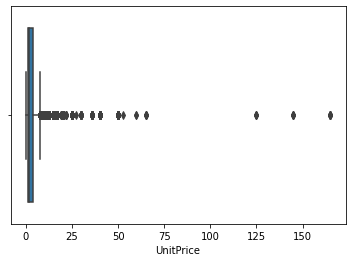

In [504]:
sns.boxplot(x='UnitPrice',data=test_norm)

In [506]:
test_norm.head(3)

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,Year,Month,Day,Timelight,Weekday,UnitPrice
0,3139,1709,1079,3,16161.0,35,2011,A,week3,Noon,Tuesday,1.65
1,617,510,3457,1,17341.0,35,2010,C,week1,Noon,Wednesday,1.25
2,14653,604,694,36,15158.0,35,2011,C,week3,Noon,Tuesday,4.25


### test_exc

In [507]:
test_exc.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,Year,Month,Day,Timelight,Weekday
362,3711,3681,2140,1,12924.0,35,2011,A,week1,Morning,Wednesday
378,5436,1366,2407,4,16947.0,35,2011,A,week2,Morning,Monday
640,2524,3683,2624,3,12464.0,3,2011,A,week1,Noon,Thursday
679,7846,3683,2624,1,12399.0,3,2011,B,week1,Noon,Thursday
1345,12623,3683,2624,1,12437.0,13,2011,C,week3,Noon,Thursday


In [508]:
dicts_exc = {}
keys = list(set(test_exc.StockCode))
#values = ["Hi", "I", "am", "John"]
for i in keys:
        dicts_exc[i] = df_exc[df_exc.StockCode==i].UnitPrice.mode()[0]
print(dicts_exc)

{3680: 11.17, 3681: 0.85, 3683: 18.0, 1511: 125.0, 1512: 125.0, 1676: 85.0, 1366: 5.95, 3678: 1.6, 3679: 0.01}


In [509]:
test_exc['ModePrice'] = test_exc['StockCode'].apply(lambda x : dicts_exc.get(x))
test_exc.ModePrice.isnull().sum()

0

In [510]:
test_exc.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,Year,Month,Day,Timelight,Weekday,ModePrice
362,3711,3681,2140,1,12924.0,35,2011,A,week1,Morning,Wednesday,0.85
378,5436,1366,2407,4,16947.0,35,2011,A,week2,Morning,Monday,5.95
640,2524,3683,2624,3,12464.0,3,2011,A,week1,Noon,Thursday,18.00
679,7846,3683,2624,1,12399.0,3,2011,B,week1,Noon,Thursday,18.00
1345,12623,3683,2624,1,12437.0,13,2011,C,week3,Noon,Thursday,18.00


In [511]:
df_exc.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Timelight,Weekday,ModePrice,PriceDiff
258,2087,3683,2624,2,18.0,12693.0,14,2011,A,week3,Noon,Monday,18.0,0.0
474,9788,3683,2624,1,2.9,17935.0,35,2011,B,week3,Noon,Sunday,18.0,15.1
543,1658,3683,2624,5,18.0,12736.0,13,2011,A,week2,Morning,Tuesday,18.0,0.0
910,15581,3683,2624,5,15.0,12408.0,3,2011,C,week1,Noon,Monday,18.0,3.0
1380,6811,3683,2624,4,18.0,12481.0,14,2011,B,week2,Morning,Thursday,18.0,0.0


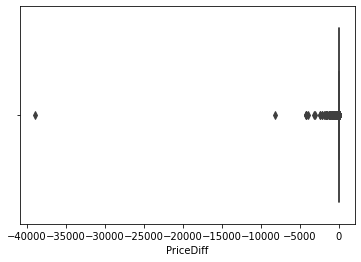

In [512]:
sns.boxplot(x='PriceDiff',data=df_exc)

In [513]:
df_exc.PriceDiff.describe()

count     1491.000000
mean       -97.252464
std       1078.100296
min     -38969.150000
25%        -10.000000
50%          0.000000
75%          0.000000
max         75.000000
Name: PriceDiff, dtype: float64

In [203]:
df_exc['PriceDiff_sign'] = df_exc['PriceDiff'].apply(lambda x: -1 if x<0 else 1)
df_exc.tail(3)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Timelight,Weekday,ModePrice,PriceDiff,PriceDiff_sign
284308,10287,3683,2624,1,28.00,12455.0,30,2011,B,week1,Morning,Thursday,18.00,-10.00,-1
284315,21487,3681,2140,2,0.42,14056.0,35,2011,C,week2,Noon,Tuesday,0.85,0.43,1
284442,9934,3683,2624,1,18.00,12523.0,13,2011,B,week3,Noon,Wednesday,18.00,0.00,1


In [204]:
df_exc[df_exc.PriceDiff==0].shape

(737, 15)

In [205]:
df_exc1 = df_exc.drop(['UnitPrice','Country'],axis=1)
df_exc1.drop(df_exc1[df_exc1.PriceDiff==0].index,inplace=True)
df_exc1.shape

(754, 13)

In [206]:
df_exc1['PriceDiff'] = df_exc1['PriceDiff'].abs()
df_exc1['PriceDiff'] = np.log(df_exc1['PriceDiff'])
df_exc1['PriceDiff'].skew()

0.333571300520199

In [207]:
df_exc1.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Year,Month,Day,Timelight,Weekday,ModePrice,PriceDiff,PriceDiff_sign
474,9788,3683,2624,1,17935.0,2011,B,week3,Noon,Sunday,18.0,2.714695,1
910,15581,3683,2624,5,12408.0,2011,C,week1,Noon,Monday,18.0,1.098612,1
1751,18827,3683,2624,1,15602.0,2010,C,week3,Noon,Tuesday,18.0,2.505526,1
1846,1223,3683,2624,3,12370.0,2010,C,week2,Morning,Friday,18.0,3.091042,-1
1965,11379,3683,2624,1,17315.0,2011,B,week3,Morning,Wednesday,18.0,1.098612,1


In [208]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


num_attribs = ['StockCode','Quantity','Description','CustomerID','InvoiceNo','ModePrice']
cat_attribs = [ 'Weekday','Timelight','Year','Month','Day']

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [209]:
df_exc2 = df_exc1.drop(['PriceDiff'],axis=1)
X= df_exc2[['InvoiceNo','StockCode', 'Quantity','Year','Month','Day','Weekday','Description','CustomerID','Timelight','ModePrice']]
y = df_exc2['PriceDiff_sign']

X = full_pipeline.fit_transform(X)
test_exc_num = full_pipeline.fit_transform(test_exc)
print(X.shape)
print(test_exc_num.shape)

(754, 23)
(644, 23)


In [212]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=67,shuffle=True)

clf = RandomForestClassifier(max_depth=2, random_state=0)

clf.fit(X_train,y_train)
pred = clf.predict(X_test)

from sklearn.metrics import precision_score, recall_score

print(precision_score(y_test, pred))
print(recall_score(y_test, pred))

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)


0.75
0.06666666666666667


array([[105,   1],
       [ 42,   3]])

In [262]:
clf.fit(X,y)
PriceDiff_sign = clf.predict(test_exc_num)

In [263]:
type(PriceDiff_sign)

numpy.ndarray

In [259]:
list(test_exc.index)[0:3]

[362, 378, 640]

In [270]:
test_exc1 = test_exc.copy()
for i in range(0,len(test_exc1)):
  index = list(test_exc1.index)[i]
  test_exc1.loc[index,'PriceDiff_sign'] = PriceDiff_sign[i]

test_exc1.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,Year,Month,Day,Timelight,Weekday,ModePrice,PriceDiff_sign
362,3711,3681,2140,1,12924.0,35,2011,A,week1,Morning,Wednesday,0.85,-1.0
378,5436,1366,2407,4,16947.0,35,2011,A,week2,Morning,Monday,5.95,-1.0
640,2524,3683,2624,3,12464.0,3,2011,A,week1,Noon,Thursday,18.00,-1.0
679,7846,3683,2624,1,12399.0,3,2011,B,week1,Noon,Thursday,18.00,-1.0
1345,12623,3683,2624,1,12437.0,13,2011,C,week3,Noon,Thursday,18.00,-1.0


In [271]:
test_exc1.PriceDiff_sign.isnull().sum()

0

In [514]:
df_exc.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Timelight,Weekday,ModePrice,PriceDiff
258,2087,3683,2624,2,18.0,12693.0,14,2011,A,week3,Noon,Monday,18.0,0.0
474,9788,3683,2624,1,2.9,17935.0,35,2011,B,week3,Noon,Sunday,18.0,15.1
543,1658,3683,2624,5,18.0,12736.0,13,2011,A,week2,Morning,Tuesday,18.0,0.0
910,15581,3683,2624,5,15.0,12408.0,3,2011,C,week1,Noon,Monday,18.0,3.0
1380,6811,3683,2624,4,18.0,12481.0,14,2011,B,week2,Morning,Thursday,18.0,0.0


In [515]:
test_exc.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,Year,Month,Day,Timelight,Weekday,ModePrice
362,3711,3681,2140,1,12924.0,35,2011,A,week1,Morning,Wednesday,0.85
378,5436,1366,2407,4,16947.0,35,2011,A,week2,Morning,Monday,5.95
640,2524,3683,2624,3,12464.0,3,2011,A,week1,Noon,Thursday,18.00
679,7846,3683,2624,1,12399.0,3,2011,B,week1,Noon,Thursday,18.00
1345,12623,3683,2624,1,12437.0,13,2011,C,week3,Noon,Thursday,18.00


In [518]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


num_attribs = ['StockCode','Quantity','Description','CustomerID','InvoiceNo','ModePrice']
cat_attribs = [ 'Weekday','Timelight','Year','Month','Day']

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [521]:
test_exc.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'CustomerID',
       'Year', 'Month', 'Day', 'Timelight', 'Weekday', 'ModePrice'],
      dtype='object')

In [522]:
#df_exc.drop(['Country'],axis=1,inplace=True)
#test_exc.drop(['Country'],axis=1,inplace=True)
X= df_exc[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'CustomerID', 'Year', 'Month', 'Day', 'Timelight', 'Weekday',
       'ModePrice']]
y = df_exc['PriceDiff']

X = full_pipeline.fit_transform(X)
test_exc_num = full_pipeline.fit_transform(test_exc)
print(X.shape)
print(test_exc_num.shape)

(1491, 23)
(644, 23)


In [523]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

tree_reg = DecisionTreeRegressor( max_depth=27,
  max_features='auto', max_leaf_nodes=None,
  min_impurity_split=1e-08, min_samples_leaf=2,
  min_samples_split=2, min_weight_fraction_leaf=0.0,
  presort=False, random_state=None)



def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

tree_scores = cross_val_score(tree_reg,X,y,
                                scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Scores: [1170.90620296  399.09002526 2275.96368843 1601.54143803  540.90551959]
Mean: 1197.6813748529307
Standard deviation: 692.1871532939957


In [528]:
tree_reg.fit(X,y)
PriceDiff = tree_reg.predict(test_exc_num)

In [529]:
for i in range(0,len(test_exc)):
  index = list(test_exc.index)[i]
  test_exc.loc[index,'PriceDiff'] = PriceDiff[i]

test_exc.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Year,Month,Day,Timelight,Weekday,ModePrice,PriceDiff
362,3711,3681,2140,1,12924.0,2011,A,week1,Morning,Wednesday,0.85,-310.17
378,5436,1366,2407,4,16947.0,2011,A,week2,Morning,Monday,5.95,0.00
640,2524,3683,2624,3,12464.0,2011,A,week1,Noon,Thursday,18.00,3.00
679,7846,3683,2624,1,12399.0,2011,B,week1,Noon,Thursday,18.00,-22.00
1345,12623,3683,2624,1,12437.0,2011,C,week3,Noon,Thursday,18.00,-22.00


In [527]:
test_exc['PriceDiff'] = np.exp(test_exc['PriceDiff'])
test_exc['PriceDiff'] = test_exc['PriceDiff']*test_exc['PriceDiff_sign']
test_exc.head()

KeyError: ignored

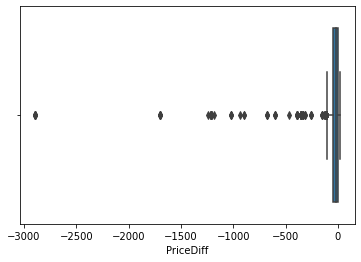

In [278]:
sns.boxplot(x='PriceDiff',data=test_exc1)

In [530]:
test_exc['UnitPrice'] = test_exc['ModePrice']-test_exc['PriceDiff']
test_exc.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Year,Month,Day,Timelight,Weekday,ModePrice,PriceDiff,UnitPrice
362,3711,3681,2140,1,12924.0,2011,A,week1,Morning,Wednesday,0.85,-310.17,311.02
378,5436,1366,2407,4,16947.0,2011,A,week2,Morning,Monday,5.95,0.00,5.95
640,2524,3683,2624,3,12464.0,2011,A,week1,Noon,Thursday,18.00,3.00,15.00
679,7846,3683,2624,1,12399.0,2011,B,week1,Noon,Thursday,18.00,-22.00,40.00
1345,12623,3683,2624,1,12437.0,2011,C,week3,Noon,Thursday,18.00,-22.00,40.00


### Test_Uni

In [531]:
test_uni.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,Year,Month,Day,Timelight,Weekday
1565,17251,3516,3738,1,17364.0,35,2011,C,week3,Noon,Thursday
3056,1998,825,1403,2,15498.0,35,2011,A,week2,Noon,Thursday
5492,926,3463,2574,2,17231.0,35,2010,C,week2,Noon,Monday
7567,307,2932,2434,2,12725.0,18,2010,C,week1,Noon,Friday
8592,19709,3049,3296,1,15299.0,35,2011,A,week2,Morning,Thursday


In [532]:
test_uni.shape

(91, 11)

In [534]:
test_exc.shape

(644, 13)

In [535]:
test_norm.shape

(121314, 12)

In [536]:
test_data.shape

(122049, 11)

In [537]:
Data_dir = '/content/gdrive/My Drive/Colab Notebooks/Datasets/MahineHack - Retail Price Prediction/'
fin_df = pd.read_csv(Data_dir+ 'final_data.csv')
#test_data = pd.read_csv(Data_dir + 'final_test_data.csv')
fin_df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Timelight,Weekday
0,0,6141,1583,144,3,3.75,14056.0,35,2011,B,week1,Noon,Friday
1,1,6349,1300,3682,6,1.95,13098.0,35,2011,B,week2,Morning,Wednesday
2,2,16783,2178,1939,4,5.95,15044.0,35,2011,C,week2,Noon,Sunday
3,3,16971,2115,2983,1,0.83,15525.0,35,2011,C,week3,Noon,Tuesday
4,4,6080,1210,2886,12,1.65,13952.0,35,2011,B,week1,Morning,Friday


In [538]:
fin_df.drop(['Unnamed: 0'],axis=1,inplace=True)
fin_df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Timelight,Weekday
0,6141,1583,144,3,3.75,14056.0,35,2011,B,week1,Noon,Friday
1,6349,1300,3682,6,1.95,13098.0,35,2011,B,week2,Morning,Wednesday
2,16783,2178,1939,4,5.95,15044.0,35,2011,C,week2,Noon,Sunday
3,16971,2115,2983,1,0.83,15525.0,35,2011,C,week3,Noon,Tuesday
4,6080,1210,2886,12,1.65,13952.0,35,2011,B,week1,Morning,Friday


In [539]:
fin_df.shape

(284767, 12)

In [540]:
test_uni.Country.nunique()

5

In [541]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


num_attribs = ['StockCode','Quantity','Description','CustomerID','InvoiceNo']
cat_attribs = [ 'Weekday','Timelight','Year','Month','Day']

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [542]:
fin_df1 = fin_df.drop(['Country'],axis=1)
X= fin_df1[['StockCode', 'Quantity','Year','Month','Day','Weekday','Timelight','Description','CustomerID','InvoiceNo']]
y = fin_df1['UnitPrice']
test_uni1 = test_uni.drop(['Country'],axis=1)

X = full_pipeline.fit_transform(X)
test_uni_num = full_pipeline.fit_transform(test_uni1)
print(X.shape)
print(test_uni_num.shape)

(284767, 22)
(91, 22)


In [543]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

tree_reg = DecisionTreeRegressor( max_depth=44,
  max_features='auto', max_leaf_nodes=None,
  min_impurity_split=1e-08, min_samples_leaf=2,
  min_samples_split=12, min_weight_fraction_leaf=0.0,
  presort=i, random_state=None)

tree_reg.fit(X,y)
UnitPrice = tree_reg.predict(test_uni_num)
UnitPrice.shape

(91,)

In [544]:
for i in range(0,len(test_uni)):
  index = list(test_uni.index)[i]
  test_uni.loc[index,'UnitPrice'] = UnitPrice[i]

test_uni.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,Year,Month,Day,Timelight,Weekday,UnitPrice
1565,17251,3516,3738,1,17364.0,35,2011,C,week3,Noon,Thursday,1.25
3056,1998,825,1403,2,15498.0,35,2011,A,week2,Noon,Thursday,2.95
5492,926,3463,2574,2,17231.0,35,2010,C,week2,Noon,Monday,8.15
7567,307,2932,2434,2,12725.0,18,2010,C,week1,Noon,Friday,3.75
8592,19709,3049,3296,1,15299.0,35,2011,A,week2,Morning,Thursday,3.29


In [546]:
test_uni.UnitPrice.isnull().sum()

0

### Final Submission

In [547]:
len(test_data) == len(test_norm) + len(test_uni) + len(test_exc)

True

In [548]:
test_norm.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,Year,Month,Day,Timelight,Weekday,UnitPrice
0,3139,1709,1079,3,16161.0,35,2011,A,week3,Noon,Tuesday,1.65
1,617,510,3457,1,17341.0,35,2010,C,week1,Noon,Wednesday,1.25
2,14653,604,694,36,15158.0,35,2011,C,week3,Noon,Tuesday,4.25
3,8634,1478,3473,2,16033.0,35,2011,B,week3,Noon,Monday,1.65
4,15546,3216,871,1,15351.0,35,2011,C,week1,Noon,Sunday,12.75


In [549]:
test_uni.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,Year,Month,Day,Timelight,Weekday,UnitPrice
1565,17251,3516,3738,1,17364.0,35,2011,C,week3,Noon,Thursday,1.25
3056,1998,825,1403,2,15498.0,35,2011,A,week2,Noon,Thursday,2.95
5492,926,3463,2574,2,17231.0,35,2010,C,week2,Noon,Monday,8.15
7567,307,2932,2434,2,12725.0,18,2010,C,week1,Noon,Friday,3.75
8592,19709,3049,3296,1,15299.0,35,2011,A,week2,Morning,Thursday,3.29


In [316]:
test_exc1.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,Year,Month,Day,Timelight,Weekday,ModePrice,PriceDiff_sign,PriceDiff,UnitPrice
362,3711,3681,2140,1,12924.0,35,2011,A,week1,Morning,Wednesday,0.85,-1.0,-0.824621,1.674621
378,5436,1366,2407,4,16947.0,35,2011,A,week2,Morning,Monday,5.95,-1.0,-1.918333,7.868333
640,2524,3683,2624,3,12464.0,3,2011,A,week1,Noon,Thursday,18.00,-1.0,-26.532998,44.532998
679,7846,3683,2624,1,12399.0,3,2011,B,week1,Noon,Thursday,18.00,-1.0,-22.000000,40.000000
1345,12623,3683,2624,1,12437.0,13,2011,C,week3,Noon,Thursday,18.00,-1.0,-22.000000,40.000000


In [550]:
test_exc_fin = test_exc.drop(['ModePrice','PriceDiff'],axis=1)
test_exc_fin.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Year,Month,Day,Timelight,Weekday,UnitPrice
362,3711,3681,2140,1,12924.0,2011,A,week1,Morning,Wednesday,311.02
378,5436,1366,2407,4,16947.0,2011,A,week2,Morning,Monday,5.95
640,2524,3683,2624,3,12464.0,2011,A,week1,Noon,Thursday,15.00
679,7846,3683,2624,1,12399.0,2011,B,week1,Noon,Thursday,40.00
1345,12623,3683,2624,1,12437.0,2011,C,week3,Noon,Thursday,40.00


In [551]:
test_fin1 = test_exc_fin.append(test_uni)
test_fin2 = test_fin1.append(test_norm)
test_fin2

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Year,Month,Day,Timelight,Weekday,UnitPrice,Country
362,3711,3681,2140,1,12924.0,2011,A,week1,Morning,Wednesday,311.02,NaN
378,5436,1366,2407,4,16947.0,2011,A,week2,Morning,Monday,5.95,NaN
640,2524,3683,2624,3,12464.0,2011,A,week1,Noon,Thursday,15.00,NaN
679,7846,3683,2624,1,12399.0,2011,B,week1,Noon,Thursday,40.00,NaN
1345,12623,3683,2624,1,12437.0,2011,C,week3,Noon,Thursday,40.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
122044,7813,2487,1289,12,15214.0,2011,B,week1,Morning,Thursday,0.38,35.0
122045,8694,3069,217,16,16200.0,2011,B,week3,Noon,Tuesday,1.69,35.0
122046,915,1419,3474,6,15555.0,2010,C,week2,Noon,Monday,1.25,35.0
122047,8156,1631,1434,1,15907.0,2011,B,week2,Noon,Thursday,3.95,35.0


In [552]:
test_fin2.loc[362]

InvoiceNo           3711
StockCode           3681
Description         2140
Quantity               1
CustomerID         12924
Year                2011
Month                  A
Day                week1
Timelight        Morning
Weekday        Wednesday
UnitPrice         311.02
Country              NaN
Name: 362, dtype: object

In [553]:
test_fin3 = test_fin2.sort_index(ascending=True)
test_fin3

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Year,Month,Day,Timelight,Weekday,UnitPrice,Country
0,3139,1709,1079,3,16161.0,2011,A,week3,Noon,Tuesday,1.65,35.0
1,617,510,3457,1,17341.0,2010,C,week1,Noon,Wednesday,1.25,35.0
2,14653,604,694,36,15158.0,2011,C,week3,Noon,Tuesday,4.25,35.0
3,8634,1478,3473,2,16033.0,2011,B,week3,Noon,Monday,1.65,35.0
4,15546,3216,871,1,15351.0,2011,C,week1,Noon,Sunday,12.75,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
122044,7813,2487,1289,12,15214.0,2011,B,week1,Morning,Thursday,0.38,35.0
122045,8694,3069,217,16,16200.0,2011,B,week3,Noon,Tuesday,1.69,35.0
122046,915,1419,3474,6,15555.0,2010,C,week2,Noon,Monday,1.25,35.0
122047,8156,1631,1434,1,15907.0,2011,B,week2,Noon,Thursday,3.95,35.0


In [554]:
test_data.shape

(122049, 11)

In [555]:
Final_UnitPrice = test_fin3['UnitPrice'].to_numpy()
type(Final_UnitPrice)

numpy.ndarray

In [556]:
Final_UnitPrice[-5:]

array([0.38, 1.69, 1.25, 3.95, 4.15])

In [557]:
text = 'SUB100-UltimateManipulation'
np.savetxt(Data_dir+"predictions"+str(100)+text+".csv", Final_UnitPrice, delimiter=",")

### Try2

In [352]:
df[df.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Timelight,Weekday


In [353]:
df.UnitPrice.skew()

83.11335887287586

In [354]:
df['UnitPrice'] = np.log(df['UnitPrice'])
df.UnitPrice.skew()

0.07906909511440448

In [355]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


num_attribs = ['StockCode','Quantity','Description','CustomerID','InvoiceNo']
cat_attribs = [ 'Country','Weekday','Timelight','Year','Month','Day']

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [356]:
X= df[['InvoiceNo','StockCode', 'Quantity','Year','Month','Day','Weekday','Description','CustomerID','Timelight','Country']]
y = df['UnitPrice']

X = full_pipeline.fit_transform(X)
test_data = full_pipeline.fit_transform(test_data)
print(X.shape)
print(test_data.shape)

(284767, 59)
(122049, 59)


In [1]:
import pandas as pd
import numpy as np
Data_dir = '/content/gdrive/My Drive/Colab Notebooks/Datasets/MahineHack - Retail Price Prediction/'
pred_5 = pd.read_csv(Data_dir+ 'predictions5.csv',header=None)
pred_18 = pd.read_csv(Data_dir+ 'predictions18.csv',header=None)
pred_sam = pd.read_csv(Data_dir+ 'submission_tree_f #Best.csv',header=None)
pred_27 = pd.read_excel (Data_dir+ 'Predictions27-avg.xlsx',header=None)
pred_28 = pd.read_excel (Data_dir+ 'Prediction28avg.xlsx',header=None)

In [2]:
pred_5.columns = ['pred_5']
pred_18.columns = ['pred_18']
pred_sam.columns = ['pred_sam']
pred_27.columns = ['pred_27']
pred_28.columns = ['pred_28']

print(pred_5.head(1))
print(pred_18.head(1))
print(pred_sam.head(1))
print(pred_27.head(1))
print(pred_28.head(1))

   pred_5
0    1.65
   pred_18
0      4.6
    pred_sam
0  UnitPrice
     pred_27
0  UnitPrice
     pred_28
0  UnitPrice


In [3]:
pred_18.index += 1 
pred_5.index += 1 
pred_18.head()

,pred_18
1,4.60
2,1.25
3,4.95
4,1.65
5,5.05


In [4]:
df = pred_18.merge(pred_5, left_index=True, right_index=True, how='inner')
df = pred_sam.merge(df, left_index=True, right_index=True, how='inner')
df = pred_27.merge(df, left_index=True, right_index=True, how='inner')
df = pred_28.merge(df, left_index=True, right_index=True, how='inner')
df.head()

,pred_28,pred_27,pred_sam,pred_18,pred_5
1,3.03,3.13,2.75,4.60,1.65
2,1.25,1.25,1.25,1.25,1.25
3,5.14,4.6,6.75,4.95,4.25
4,4.23,1.65,11.95,1.65,1.65
5,3.63,3.15,5.05,5.05,1.25


In [5]:
for i in range(29,40):
  
  df[]

SyntaxError: ignored

In [6]:
#a = (df['pred_28']+df['pred_27'])/2
pred_29 = ((df['pred_28']+df['pred_27'])/2).to_numpy()
pred_30 = (pred_29 + df['pred_28'].to_numpy())/2
pred_31 = (pred_30 + pred_29)/2
pred_32 = (pred_31 + pred_30)/2
pred_33 = (pred_32 + pred_31)/2
pred_34 = (pred_33 + pred_32)/2
pred_35 = (pred_34 + pred_33)/2
pred_36 = (pred_35 + pred_34)/2
pred_37 = (pred_36 + pred_35)/2
pred_38 = (pred_37 + pred_36)/2
pred_39 = (pred_38 + pred_37)/2
pred_40 = (pred_39 + pred_38)/2

In [467]:
text = 'SUB25-UltimateManipulation'
np.savetxt(Data_dir+"predictions"+str(70)+"new.csv", pred_70, delimiter=",")

In [417]:
!ls Data_dir

ls: cannot access 'Data_dir': No such file or directory


In [7]:
pred_sam_best = pd.read_csv (Data_dir+ 'sambit_best.csv',header=None)
pred_sam_best.columns = ['pred_sam_best']
pred_sam_best.drop(0,axis=0,inplace=True)
pred_sam_best.head()

,pred_sam_best
1,2.665
2,1.25
3,4.925
4,4.225
5,6.025


In [8]:
pred_sam2 = pred_sam_best['pred_sam_best'].to_numpy()
pred_28 = df['pred_28'].to_numpy()

In [12]:
pred_41 = (pred_28 + pred_sam2)/2

In [9]:
pred_sam2 = pred_sam2.astype(np.float)

In [10]:
pred_28 = pred_28.astype(np.float)

In [18]:
pred_42 = (pred_sam2 + pred_41)/2
pred_46 = (pred_sam2 + pred_45)/2
pred_38 = (pred_37 + pred_36)/2
pred_39 = (pred_38 + pred_37)/2
pred_47 = (pred_sam2 + pred_46)/2

NameError: ignored

In [13]:
for i in range(41,99):
  exec(f'pred_{i+1} = (pred_{i} + pred_{i-1})/2 ') 

In [16]:
pred_5 = pred_5.to_numpy()
pred_18 = pred_18.to_numpy()

In [15]:
type(pred_18)

pandas.core.frame.DataFrame

In [ ]:
#pred_102 = (pred_sam2 + pred_83)/2
#pred_103 = (pred_sam2 + pred_97)/2
pred_104 = (pred_99 + pred_5+ pred_18 + pred_sam2)/4

In [564]:
np.savetxt(Data_dir+"predictions"+str(75)+"new.csv", pred_75, delimiter=",")
np.savetxt(Data_dir+"predictions"+str(80)+"new.csv", pred_80, delimiter=",")
np.savetxt(Data_dir+"predictions"+str(90)+"new.csv", pred_90, delimiter=",")
np.savetxt(Data_dir+"predictions"+str(95)+"new.csv", pred_90, delimiter=",")
np.savetxt(Data_dir+"predictions"+str(99)+"new.csv", pred_99, delimiter=",")
np.savetxt(Data_dir+"predictions"+str(102)+"new.csv", pred_102, delimiter=",")
np.savetxt(Data_dir+"predictions"+str(103)+"new.csv", pred_103, delimiter=",")
np.savetxt(Data_dir+"predictions"+str(104)+"new.csv", pred_104, delimiter=",")